<a href="https://colab.research.google.com/github/jadercaro/ClasificacionPuntajesCredito/blob/main/Clasificaci%C3%B3n_de_puntajes_de_creditos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clasificación de puntajes de créditos bancarios**

El proyecto tiene como objetivo desarrollar un modelo de Machine Learning y Deep Learning para predecir la clasificación del score crediticio de una persona con el propósito de evaluar su elegibilidad para obtener un crédito bancario. El score crediticio es una métrica fundamental que las instituciones financieras utilizan para determinar el riesgo crediticio de un solicitante y decidir si se le debe otorgar un préstamo.

#Motivación
  Crear un modelo de Machine Learning para predecir la clasificación del score crediticio en solicitudes de crédito bancario puede revolucionar la forma en que las instituciones financieras toman decisiones. Al automatizar y mejorar la precisión de la evaluación de la solvencia crediticia, este proyecto tiene el potencial de agilizar el proceso de aprobación de préstamos, permitir un acceso más equitativo al crédito y reducir el riesgo financiero tanto para los prestatarios como para los prestamistas. Al brindar una herramienta confiable para evaluar el riesgo crediticio, contribuimos a fomentar la inclusión financiera y a empoderar a las personas con opciones más accesibles y oportunidades para alcanzar sus metas financieras.


La base de datos que usamos para este proyecto fue tomada de:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification






El primer paso será cargar la base de datos en formato .CSV

In [1]:
import pandas as pd
database = pd.read_csv('train.csv')

database

<ipython-input-1-59f09087b40a>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  database = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Ahora haremos un pequeño análisis de los datos presentes, para conocer la cantidad de datos faltantes, el equilibrio de las clases, los tipos de clases

In [2]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [3]:
database.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [12]:
database['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

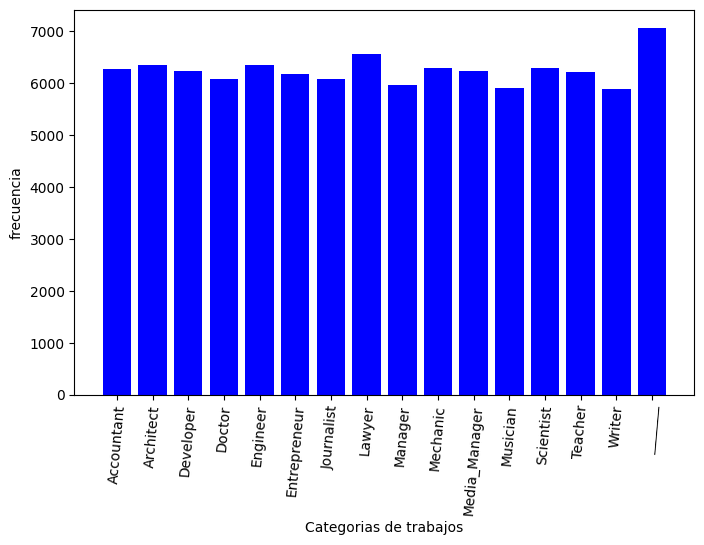

In [27]:
import numpy as np
import matplotlib.pyplot as plt
unique_element, counts = np.unique(database['Occupation'], return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(unique_element, counts, color='blue')
plt.xlabel('Categorias de trabajos')
plt.ylabel('frecuencia')
plt.xticks(rotation=85)

plt.show()

In [39]:
columnas = database.columns

In [56]:

for columna in (columnas):
  if(database[columna].dtypes == object):

    unique_element, counts = pd.unique(database[columna], return_counts = True)





ID
Customer_ID
Month
Name
Age
SSN
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Credit_Mix
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour
Monthly_Balance
Credit_Score


In [54]:
database['Age']

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object